In [24]:
#importing and reading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

data = pd.read_csv("student_sleep.csv")
data.head()


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2.0,37.0,10.0,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5.0,74.0,2.0,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5.0,NaN,5.0,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4.0,55.0,9.0,19.82,NaN,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0.0,85.0,3.0,20.98,6.12,8.98,9.01


In [6]:
data.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,498.000000,499.000000,498.000000,499.000000,497.000000,499.000000,497.000000,498.000000,500.000000,500.000000
mean,250.500000,21.53600,6.469880,5.971944,2.529518,2.460922,62.374245,5.354709,11.157445,12.393775,6.929900,8.988100
std,144.481833,2.33315,1.486863,3.472493,0.858167,1.683840,35.261877,2.965740,5.977703,5.789205,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.000000,3.000000,6.080000,7.327500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.000000,2.600000,2.000000,63.000000,5.000000,10.630000,12.715000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,94.000000,8.000000,16.150000,17.342500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       498 non-null    float64
 5   Study_Hours          499 non-null    float64
 6   Screen_Time          498 non-null    float64
 7   Caffeine_Intake      499 non-null    float64
 8   Physical_Activity    497 non-null    float64
 9   Sleep_Quality        499 non-null    float64
 10  Weekday_Sleep_Start  497 non-null    float64
 11  Weekend_Sleep_Start  498 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 54.8+ KB


In [ ]:
#handle missing values
missing_before = data.isnull().sum()

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

missing_after = data.isnull().sum()

missing_comparison = pd.DataFrame({
    "Column": data.columns,
    "Missing_Before": missing_before.values,
    "Missing_After": missing_after.values
})

missing_comparison

,Column,Missing_Before,Missing_After
0,Student_ID,0,0
1,Age,0,0
2,Gender,0,0
3,University_Year,0,0
4,Sleep_Duration,2,0
5,Study_Hours,1,0
6,Screen_Time,2,0
7,Caffeine_Intake,1,0
8,Physical_Activity,3,0
9,Sleep_Quality,1,0


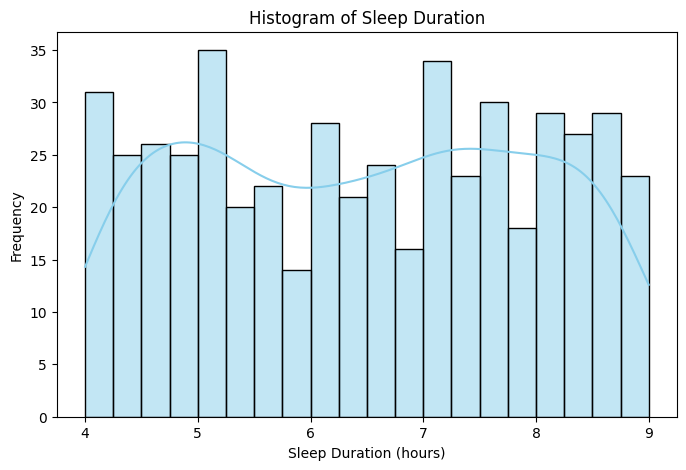

In [13]:
#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["Sleep_Duration"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Histogram of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()


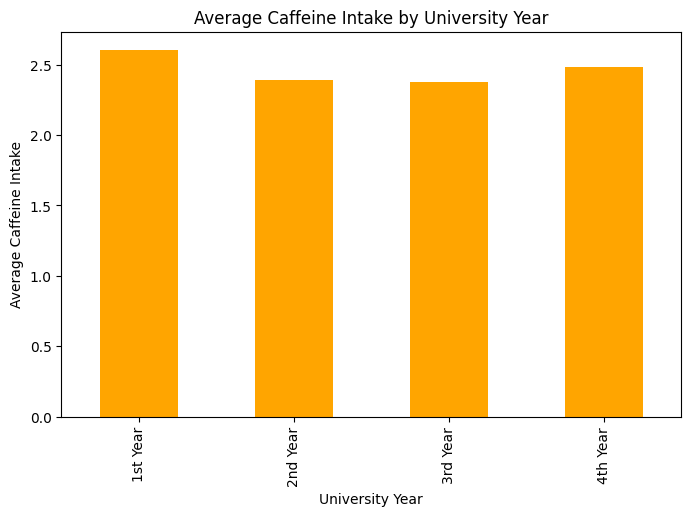

In [ ]:
#bargraph
plt.figure(figsize=(8, 5))
avg_caffeine = data.groupby("University_Year")["Caffeine_Intake"].mean().sort_index()
avg_caffeine.plot(kind='bar', color='orange')
plt.title("Average Caffeine Intake by University Year")
plt.xlabel("University Year")
plt.ylabel("Average Caffeine Intake")
plt.show()

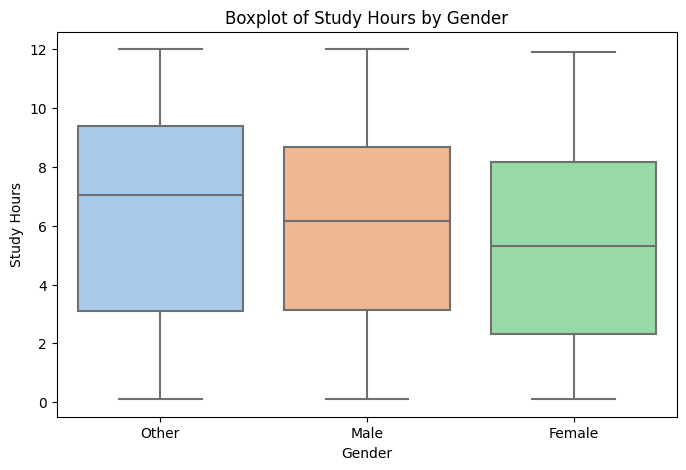

In [16]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Gender", y="Study_Hours", palette="pastel")
plt.title("Boxplot of Study Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Study Hours")
plt.show()

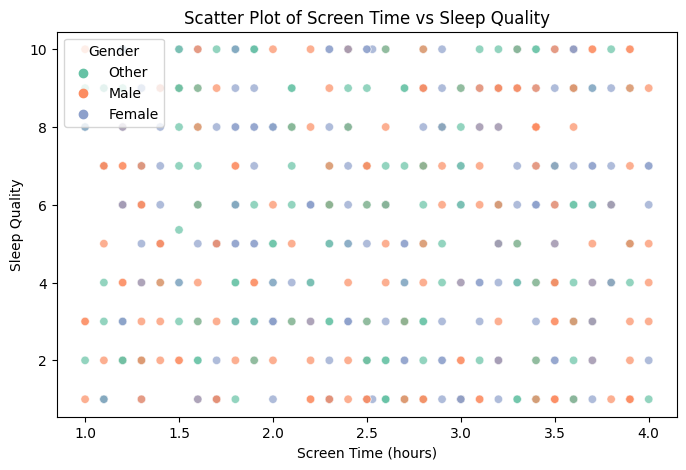

In [18]:
#scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Screen_Time", y="Sleep_Quality", hue="Gender", palette="Set2", alpha=0.7)
plt.title("Scatter Plot of Screen Time vs Sleep Quality")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Sleep Quality")
plt.legend(title="Gender")
plt.show()

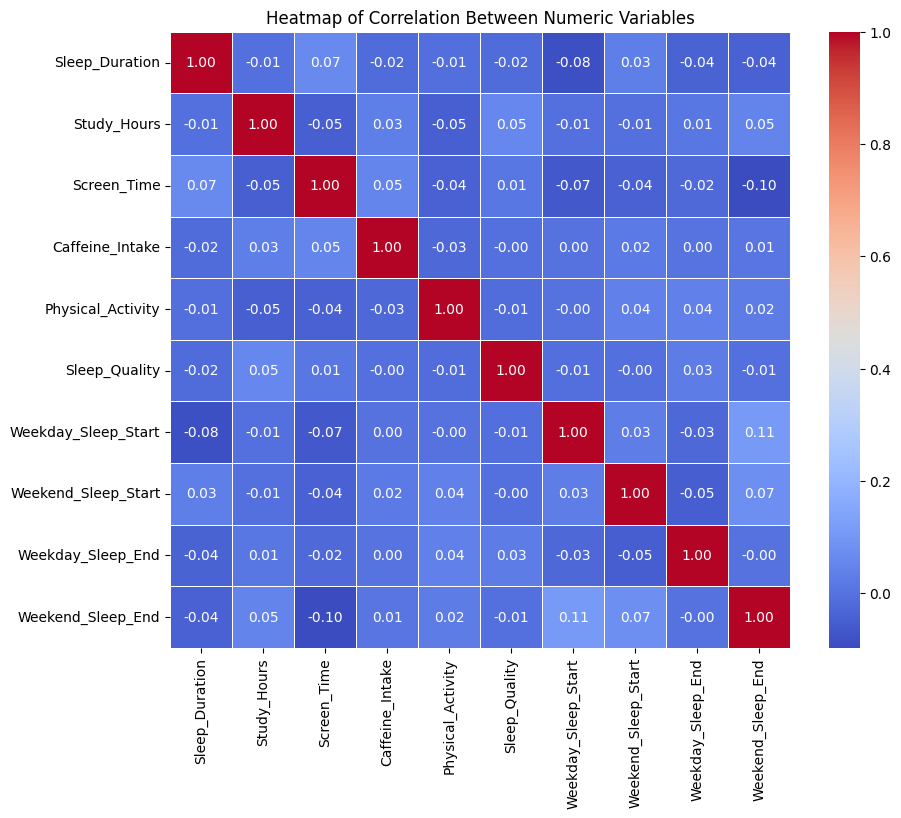

In [19]:
#heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include='float64').corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Between Numeric Variables")
plt.show()

In [ ]:
#standardisation
scaler = StandardScaler()
numerical_columns = ['Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data[numerical_columns].head())


   Sleep_Duration  Study_Hours  Screen_Time  Caffeine_Intake  \
0        0.829819     0.556351     1.017407        -0.274282   
1       -0.114598     0.008096    -0.735772         1.510934   
2       -0.924099     0.210084     1.601800         1.510934   
3       -0.114598     0.758339     0.316135         0.915862   
4       -1.193932    -0.944137     0.199257        -1.464426   

   Physical_Activity  Sleep_Quality  
0      -7.224901e-01       1.569459  
1       3.310243e-01      -1.133423  
2       1.206030e-16      -0.119842  
3      -2.099696e-01       1.231599  
4       6.442313e-01      -0.795563  


In [25]:
#label encoding 
label_encoder = LabelEncoder()
data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender'])
print(data[['Gender', 'Gender_Encoded']].head())


  Gender  Gender_Encoded
0  Other               2
1   Male               1
2   Male               1
3  Other               2
4   Male               1


In [26]:
#onehot encoding
one_hot_encoded = pd.get_dummies(data['University_Year'], prefix='Year')
data = pd.concat([data, one_hot_encoded], axis=1)
print(data[['University_Year'] + list(one_hot_encoded.columns)].head())


  University_Year  Year_1st Year  Year_2nd Year  Year_3rd Year  Year_4th Year
0        2nd Year              0              1              0              0
1        1st Year              1              0              0              0
2        4th Year              0              0              0              1
3        4th Year              0              0              0              1
4        4th Year              0              0              0              1


Accuracy: 0.99


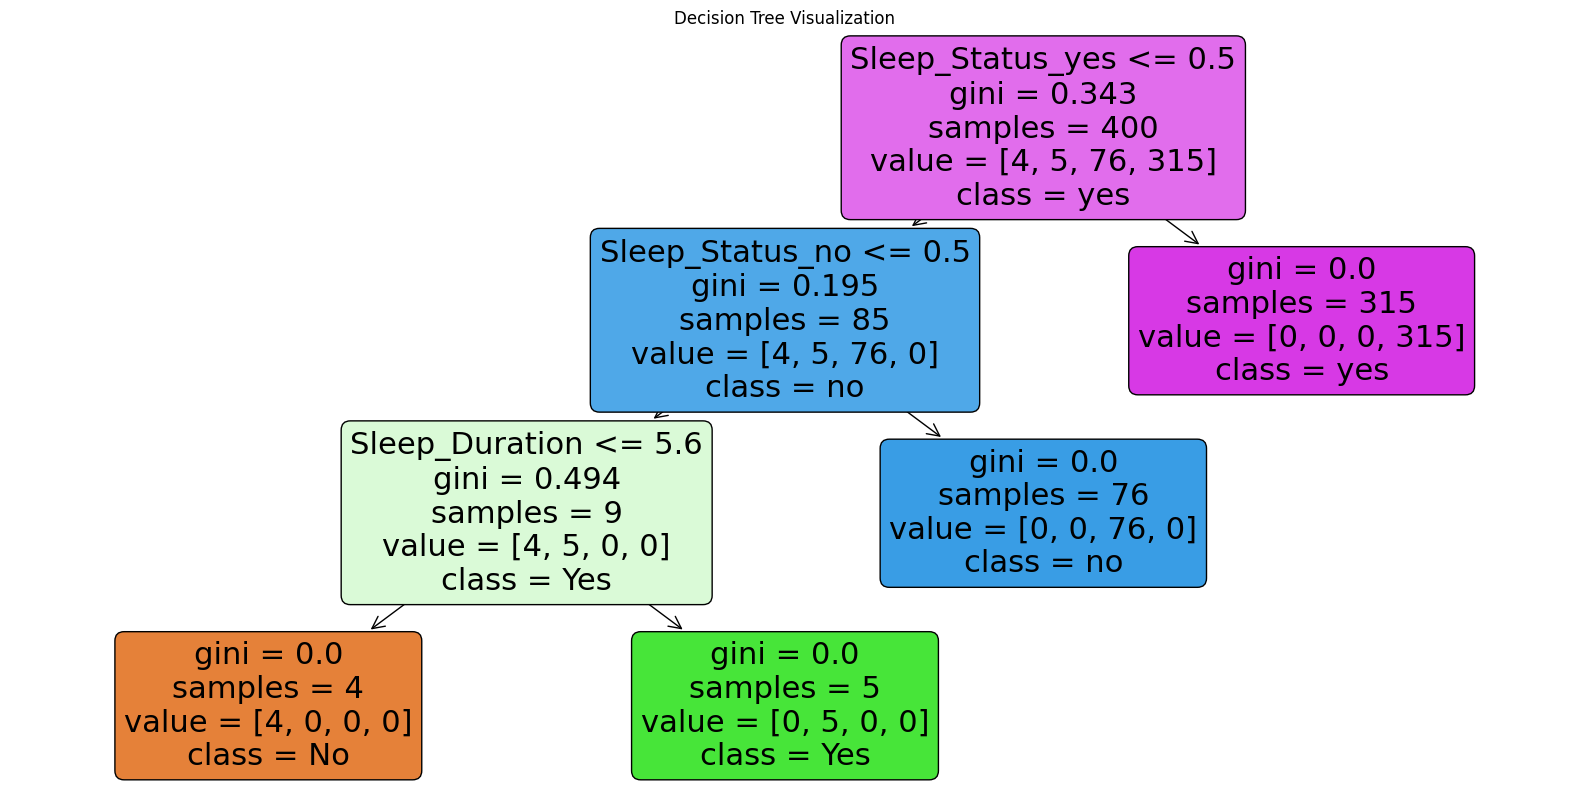

In [ ]:
#Decision tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv("student_sleep.csv")

X = data.drop(columns=["Student_ID"])
y = data["Sleep_Status"]

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(cls) for cls in tree_model.classes_], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Pre-Pruning Accuracy: 1.0
Post-Pruning Accuracy: 1.0


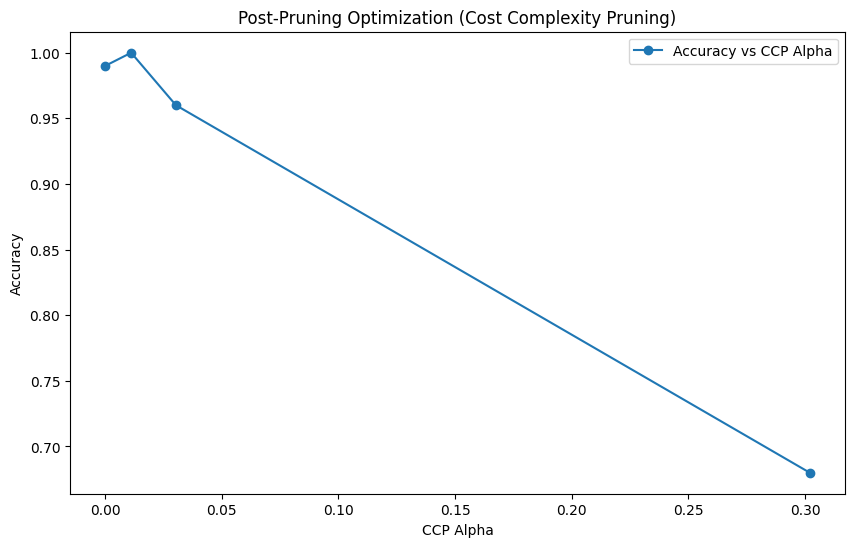

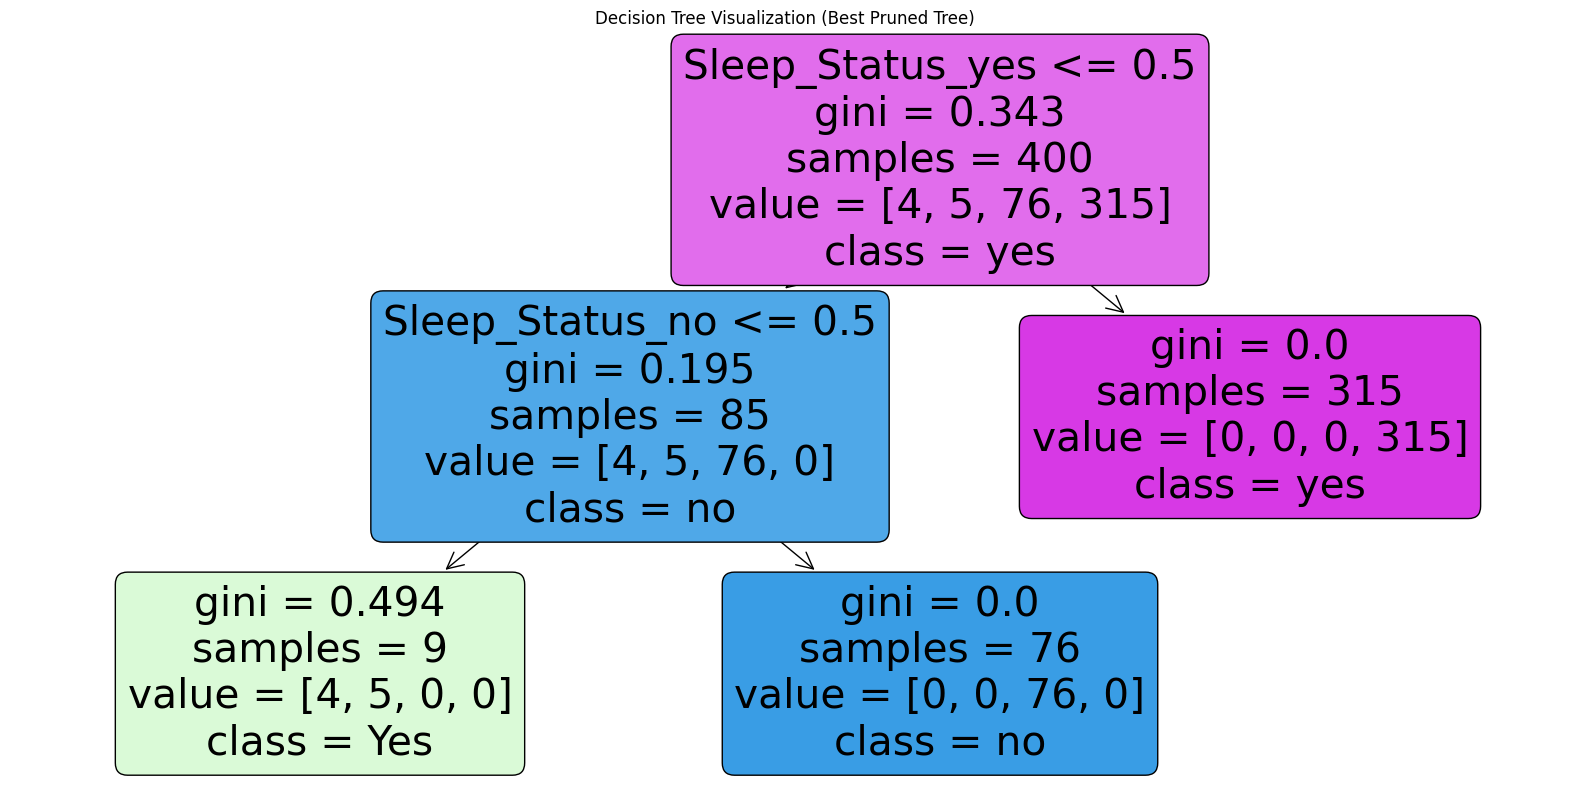

In [13]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Pre-Pruning
# Train a decision tree with pre-pruning parameters
pre_pruned_tree = DecisionTreeClassifier(
    criterion='gini',         # Splitting criterion
    max_depth=5,              # Limit the maximum depth of the tree
    min_samples_split=10,     # Minimum samples to split a node
    min_samples_leaf=5,       # Minimum samples in a leaf node
    random_state=42
)
pre_pruned_tree.fit(X_train, y_train)

# Evaluate the pre-pruned tree
y_pred_pre_pruned = pre_pruned_tree.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print("Pre-Pruning Accuracy:", accuracy_pre_pruned)

# Post-Pruning
# Train a fully grown decision tree
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

# Extract the cost complexity pruning path
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train and evaluate trees for each ccp_alpha
pruned_trees = []
pruned_accuracies = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    pruned_trees.append(tree)
    y_pred = tree.predict(X_test)
    pruned_accuracies.append(accuracy_score(y_test, y_pred))

# Find the best alpha and corresponding tree
best_index = pruned_accuracies.index(max(pruned_accuracies))
best_pruned_tree = pruned_trees[best_index]
best_post_pruned_accuracy = pruned_accuracies[best_index]

print("Post-Pruning Accuracy:", best_post_pruned_accuracy)

# Visualization of Post-Pruning Accuracy vs CCP Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, pruned_accuracies, marker='o', label='Accuracy vs CCP Alpha')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Post-Pruning Optimization (Cost Complexity Pruning)")
plt.legend()
plt.show()

# Visualize the Best Pruned Tree
plt.figure(figsize=(20, 10))
plot_tree(best_pruned_tree, feature_names=X.columns, class_names=[str(cls) for cls in le.classes_], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Best Pruned Tree)")
plt.show()
